<a href="https://colab.research.google.com/github/ChristianVaughn/BioInspiredML/blob/main/%5CTSP%5Cmain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import python packages to be used

In [ ]:
import random, numpy as np, math, copy, matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix
from google.colab import files

Create a list of random cities to be used as the dataset for TSP

In [ ]:

#create list of 50 random cities. Probably need to make this a 2d array with an x,y component. 
cities = [random.sample(range(100), 2) for x in range(50)];
print(cities)

#tour = random.sample(range(50),50);
#print(tour) some edit here by NB

#Generate a distance matrix from the list of 50 cities
df = pd.DataFrame(cities, columns=['xcord', 'ycord'])
cities_distance_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
#cities_distance_matrix.head()

#Randomly select a city to start at for both algorithms
root = random.randint(0,49) #Randomly select one vertex as the root.

[[28, 74], [6, 8], [6, 25], [25, 48], [78, 62], [72, 94], [4, 21], [63, 12], [76, 49], [78, 16], [98, 61], [6, 12], [59, 82], [79, 64], [70, 7], [49, 72], [47, 35], [99, 0], [16, 7], [4, 99], [7, 25], [91, 18], [84, 4], [4, 51], [35, 53], [88, 83], [16, 46], [47, 75], [21, 67], [14, 57], [20, 40], [66, 44], [12, 36], [14, 72], [23, 17], [54, 91], [43, 61], [98, 44], [52, 14], [78, 50], [19, 89], [12, 51], [21, 48], [50, 75], [75, 15], [70, 35], [43, 62], [12, 15], [95, 45], [16, 49]]


Update Methods: 

*   as_pheroupdate: Ant System Update, S*upd* <- S*iter*
*   ib_pheroupdate: Iteration Best Update, S*upd* <- arg max F(s) (to avoid premature converence, best 10(?) will be used)



In [ ]:
#Ant System Update
def as_pheroupdate(pheromone_maxtix,s_iter,total_list):
   for index in range(len(total_list)):
    #print(s_iter[index])
    for jdex in range(len(s_iter[index])-1):
      x = s_iter[index][jdex]
      y = s_iter[index][jdex+1]
      pheromone_maxtix.loc[y][x] += 1/total_list[index]

In [ ]:
#Iteration Best Update
def ib_pheroupdate(pheromone_maxtix,s_iter,total_list):
  sort_index = np.argsort(np.asarray(total_list))
  #print(sort_index)
  #print(np.sort(vals))
  for index in range(10):
    for jdex in range(len(s_iter[index])-1):
      x = s_iter[sort_index[index]][jdex]
      y = s_iter[sort_index[index]][jdex+1]
      pheromone_maxtix.loc[y][x] += 1/total_list[sort_index[index]]

Ant Colony Optimization using adjacency matrices

In [ ]:
#Start of ACO algo

def aco_func(pheromone_maxtix,ants,alpha,update_func):
  s_iter = []
  total_list = []
  for i in range(ants):
    total = 0.0;
    currentlocation = root
    s = []
    s.append(root)
    possible_move_matrix = cities_distance_matrix.copy(deep=True) #do we need to remove the starting position?
    pheromone_maxtix_dupe = pheromone_maxtix.copy(deep=True) #do we need to remove the starting position?
    possible_move_matrix = possible_move_matrix.drop(currentlocation) #remove starting position from possible moves
    pheromone_maxtix_dupe = pheromone_maxtix_dupe.drop(currentlocation) #remove starting position from pheromones
    #print("start")
    while len(possible_move_matrix) !=0:
      templist = list()
      templist2 = list()
      for index, row in pheromone_maxtix_dupe.iterrows():
        prob = row[currentlocation] ** alpha 
        templist.append(prob)
      for index, row in pheromone_maxtix_dupe.iterrows():
        prob = (row[currentlocation] ** alpha) / sum(templist)
        templist2.append(prob)

      randomCity = possible_move_matrix.sample(n=1, weights=templist2)
      #print(randomCity)
      newcity = randomCity.index[0]
      #print("newcity:")
      #print(newcity)
      s.append(newcity)
      total += cities_distance_matrix.loc[currentlocation][newcity]
      currentlocation = newcity
      possible_move_matrix = possible_move_matrix.drop(currentlocation)
      pheromone_maxtix_dupe = pheromone_maxtix_dupe.drop(currentlocation)

    s.append(root)
    total += cities_distance_matrix.loc[root][currentlocation]  
    total_list.append(total)
    s_iter.append(s)

  #Pheromone Update
  update_func(pheromone_maxtix,s_iter,total_list)

Parameters for ACO

In [ ]:
maxIterations = 3000
ants= 50
alpha = 1

Initialize Pheromone Matrix

In [ ]:
pheromone_maxtix = pd.DataFrame(1.0,index=range(50),columns=range(50))

(Optional) Load a list of cities and their corresponding pheromone matrix from a spreadsheet

In [ ]:
url = 'https://raw.githubusercontent.com/ChristianVaughn/BioInspiredML/main/TSP/Dataset3/cities.csv?token=AHSGZY7FU5YPWMREIOXE6ADANYSAW'
citiestemp = pd.read_csv(url)
citiestemp = citiestemp.loc[:, ~citiestemp.columns.str.contains('^Unnamed')]
root = citiestemp.tail(1).iloc[0,2] #citiestemp.loc[:,'root']
citiestemp = citiestemp.loc[:, ~citiestemp.columns.str.contains('^root')]
citiestemp = citiestemp.dropna()
cities = citiestemp.values.tolist()
for x in range(len(cities)):
  for y in range(2):
    cities[x][y] = int(cities[x][y])
root = int(root)
#Generate a distance matrix from the list of 50 cities
df = pd.DataFrame(cities, columns=['xcord', 'ycord'])
cities_distance_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
print(cities)

[[63, 54], [77, 31], [86, 2], [94, 25], [13, 56], [41, 37], [74, 89], [28, 59], [54, 32], [57, 27], [27, 10], [82, 62], [10, 12], [35, 90], [70, 98], [35, 48], [9, 61], [2, 57], [11, 84], [83, 62], [64, 83], [46, 72], [98, 71], [14, 35], [91, 84], [11, 49], [22, 78], [0, 53], [99, 47], [19, 37], [63, 89], [8, 74], [98, 65], [58, 33], [49, 36], [35, 40], [17, 58], [50, 94], [93, 74], [33, 76], [51, 63], [22, 0], [11, 99], [10, 4], [34, 20], [21, 51], [44, 80], [39, 50], [50, 64], [90, 89]]


Pheromone Matrix for AS update

In [ ]:
url = 'https://raw.githubusercontent.com/ChristianVaughn/BioInspiredML/main/TSP/Dataset3/pheromone_matrix_original.csv?token=AHSGZY2DFBCT4WJENY67TW3AN2FUM'
pmatrix = pd.read_csv(url)
pheromone_maxtix = pmatrix.loc[:, ~pmatrix.columns.str.contains('^Unnamed')]
pheromone_maxtix.index = range(50)
pheromone_maxtix.columns = range(50)

Pheromone Matrix for IB update

In [ ]:
url = 'https://raw.githubusercontent.com/ChristianVaughn/BioInspiredML/main/TSP/Dataset3/pheromone_matrix_ib%206000it.csv?token=AHSGZY3PRPO52UZDNAA32KTAOE5K4'
pmatrix = pd.read_csv(url)
pheromone_maxtix = pmatrix.loc[:, ~pmatrix.columns.str.contains('^Unnamed')]
pheromone_maxtix.index = range(50)
pheromone_maxtix.columns = range(50)

Click to run ACO algorithm for the specified number of iterations

In [ ]:
for iteration in range(maxIterations):
  aco_func(pheromone_maxtix,ants,alpha,ib_pheroupdate)

In [ ]:
pheromone_maxtix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.670721,1.577562,1.575260,1.452109,1.590571,1.589361,1.472166,1.681318,1.513654,1.503850,1.571118,1.441474,1.469905,1.590221,1.605027,1.489407,1.424540,1.460337,1.600754,1.589876,1.587002,1.536947,1.453151,1.567719,1.501618,1.458605,1.411209,1.563268,1.497683,1.506719,1.415179,1.611825,1.630821,1.546227,1.515198,1.455955,1.474963,1.530080,1.464594,1.538620,1.558092,1.472069,1.551152,1.495936,1.478024,1.515754,1.603177,1.560005,1.498547
1,1.646638,1.000000,1.747954,1.745624,1.455126,1.585910,1.550072,1.467008,1.672073,1.633424,1.511501,1.593441,1.505503,1.443849,1.530977,1.549048,1.459776,1.427167,1.429801,1.609346,1.523709,1.534076,1.588774,1.472776,1.533637,1.470785,1.431170,1.413091,1.663595,1.505858,1.480559,1.390301,1.613551,1.653694,1.550751,1.483065,1.453781,1.451461,1.553404,1.439064,1.523036,1.580268,1.424136,1.550202,1.516868,1.451307,1.478608,1.533899,1.514378,1.525325
2,1.513837,1.826846,1.000000,1.959765,1.417180,1.582155,1.443350,1.421106,1.651312,1.727184,1.613316,1.605296,1.537121,1.462108,1.431407,1.508163,1.396821,1.453980,1.362010,1.607264,1.435726,1.434406,1.574052,1.514885,1.495161,1.430275,1.418810,1.466882,1.770283,1.507376,1.458088,1.354613,1.582449,1.651751,1.605142,1.540035,1.492893,1.449645,1.582022,1.486788,1.507887,1.678445,1.350620,1.568221,1.560143,1.413664,1.520677,1.505989,1.486518,1.505700
3,1.572800,1.820086,1.934010,1.000000,1.402289,1.526352,1.537817,1.461412,1.591566,1.684899,1.551766,1.703613,1.487681,1.427086,1.490642,1.466489,1.405016,1.387541,1.409703,1.657641,1.549258,1.477253,1.637269,1.441626,1.607044,1.412383,1.389355,1.396309,1.845338,1.423131,1.484967,1.410799,1.710768,1.656796,1.592466,1.493889,1.428783,1.450603,1.630444,1.418274,1.502074,1.545518,1.387149,1.456805,1.543710,1.433550,1.446181,1.490320,1.518292,1.570604
4,1.446320,1.426140,1.406620,1.408390,1.000000,1.504402,1.438070,1.636624,1.471008,1.500761,1.566891,1.396369,1.617956,1.498075,1.422403,1.573480,1.732704,1.673703,1.670117,1.396990,1.455791,1.538182,1.390565,1.673028,1.458079,1.716937,1.586943,1.701975,1.369235,1.616723,1.472814,1.734845,1.413588,1.469431,1.447098,1.530448,1.656983,1.464337,1.423787,1.553176,1.509710,1.477208,1.669200,1.574330,1.585880,1.691534,1.469665,1.564474,1.481609,1.384770
5,1.595341,1.605702,1.593573,1.521866,1.500887,1.000000,1.475493,1.525508,1.723087,1.604756,1.600196,1.448546,1.582908,1.445142,1.461384,1.628824,1.535264,1.522603,1.469539,1.472320,1.433951,1.504794,1.406267,1.527215,1.431371,1.554653,1.482275,1.532266,1.481935,1.650192,1.424377,1.478972,1.398821,1.616096,1.648042,1.665974,1.577702,1.437716,1.449795,1.505853,1.455336,1.653972,1.422535,1.610901,1.608820,1.537788,1.491752,1.605662,1.551288,1.410106
6,1.575628,1.541496,1.458991,1.510783,1.413577,1.427562,1.000000,1.467130,1.495760,1.452484,1.400348,1.642587,1.385847,1.567111,1.841612,1.452733,1.476660,1.408673,1.521190,1.659722,1.747278,1.586694,1.688421,1.380950,1.795869,1.477285,1.519046,1.362996,1.583679,1.414562,1.732740,1.440719,1.676861,1.487174,1.439612,1.407485,1.419065,1.662295,1.712792,1.526294,1.521397,1.409831,1.527390,1.399545,1.376088,1.428211,1.569277,1.501166,1.587744,1.787008
7,1.455656,1.448735,1.429977,1.428405,1.613695,1.538861,1.465441,1.000000,1.476295,1.490274,1.525634,1.469728,1.526520,1.566139,1.477532,1.597063,1.614407,1.599728,1.589084,1.450967,1.544226,1.511654,1.478150,1.663123,1.413103,1.579333,1.554473,1.572067,1.403302,1.499898,1.486193,1.629655,1.467252,1.514822,1.519698,1.579450,1.631782,1.506917,1.470400,1.569707,1.572737,1.475390,1.619622,1.525126,1.566031,1.620580,1.554282,1.560872,1.568026,1.447361
8,1.638198,1.704190,1.670719,1.584417,1.486637,1.695125,1.446127,1.457000,1.000000,1.692683,1.592563,1.502707,1.546206,1.431832,1.529434,1.626320,1.507879,1.421115,1.455908,1.538807,1.450923,1.541747,1.475681,1.537439,1.478017,1.513515,1.46317

(Optional) Store the list of cities and pheromone matrix to text files

In [ ]:
tempdf = pd.DataFrame(cities,columns=['x','y'])
tempdf = tempdf.append(pd.DataFrame([root],columns=['root']))
tempdf.to_csv('cities.csv')
files.download('cities.csv')  #download the csv file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pheromone_maxtix.to_csv('pheromone_matrix.csv') #stores pheromone matrix as a csv file that can be downloaded
files.download('pheromone_matrix.csv')  #download the csv file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Finding 5 of the most optimal paths using the pheromone matrix

In [ ]:
def aco_results():
  s_iter = []
  total_list = []
  for i in range(5):
    total = 0.0;
    currentlocation = root
    s = []
    s.append(root)
    possible_move_matrix = cities_distance_matrix.copy(deep=True) #do we need to remove the starting position?
    pheromone_maxtix_dupe = pheromone_maxtix.copy(deep=True) #do we need to remove the starting position?
    possible_move_matrix = possible_move_matrix.drop(currentlocation) #remove starting position from possible moves
    pheromone_maxtix_dupe = pheromone_maxtix_dupe.drop(currentlocation) #remove starting position from pheromones
    #print("start")
    while len(possible_move_matrix) !=0:
      templist = list()
      templist2 = list()

      #change stuff here
      possiblemoves = pheromone_maxtix_dupe[currentlocation].nlargest(5,keep='all')
      #print(possiblemoves)
      for index in range(possiblemoves.size):
        prob = possiblemoves.iloc[index] ** alpha 
        templist.append(prob)
      for index in range(possiblemoves.size):
        prob = (possiblemoves.iloc[index] ** alpha) / sum(templist)
        templist2.append(prob)

      #possiblemoves = possiblemoves.to_frame()
      randomCity = possiblemoves.sample(n=1, weights=templist2)
      newcity = randomCity.index[0]
      #print("newcity:")
      #print(newcity)
      s.append(newcity)
      total += cities_distance_matrix.loc[currentlocation][newcity]
      currentlocation = newcity
      possible_move_matrix = possible_move_matrix.drop(currentlocation)
      pheromone_maxtix_dupe = pheromone_maxtix_dupe.drop(currentlocation)

    s.append(root)
    total += cities_distance_matrix.loc[root][currentlocation]  
    total_list.append(total)
    s_iter.append(s)
  return s_iter,total_list

Heuristic Algorithm - Nearest Neighbor

Find the vertex that is closest (more precisely, has the lowest cost) to the current position but is not yet part of the route, and add it into the route.
Repeat until the route includes each vertex.

In [ ]:
#Heuristic algo - nearest neighbor
currentlocation = root  #start at the randomly determined starting city
total = 0   #counter for the total distance in the path taken
route = []    #list to store the path taken
citycopy = cities_distance_matrix.copy(deep=True) #create a deep copy to avoid overwriting the original dataframe   
citycopy = citycopy.replace(0, np.NaN)  #replace all 0 values with NaN for search optimization step
route.append(currentlocation) #append the starting position to the route

#Each of the cities will be visited once, with the exception of the starting city, which we will return to
for i in range(len(cities)-1):
  nextlocation = citycopy[currentlocation].nsmallest(1,keep='first') #using the adjacency matrix, finds the smallest value and returns the next city to be visited
  total += nextlocation.iloc[0] #adds the distance between the current city and the next city to the total
  route.append(nextlocation.index[0]) #appends the next city to the route
  citycopy = citycopy.drop(currentlocation) #drops the current city from the adjacency matrix since it can no longer be visited (with the exception of the return to the starting city)
  currentlocation = nextlocation.index[0] #sets the current location to the next location

#return to the starting location at the end
total += cities_distance_matrix.loc[root][currentlocation] #find the distance from the last city visited to the starting location 
route.append(root) #append the starting location to the route

In [ ]:
print(route)
print(total)


[1, 3, 28, 32, 22, 38, 24, 49, 6, 14, 30, 20, 37, 46, 21, 48, 40, 0, 11, 19, 33, 8, 9, 34, 5, 35, 15, 47, 7, 45, 36, 4, 16, 17, 27, 25, 23, 29, 44, 10, 41, 43, 12, 31, 18, 26, 39, 13, 42, 2, 1]
748.2254809647552


Graph Stuff

In [ ]:
def sortCitiesSolution(lst):
    global cities
    x = []
    y = []
    for val in lst:
        x.append(cities[val][0])
        y.append(cities[val][1])
    return (x,y)
    

Nearest Neighbor stuff

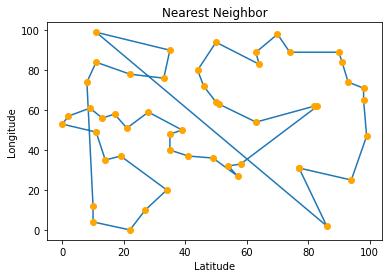

In [ ]:
nearestNeighborX,nearestNeighborY = sortCitiesSolution(route)
fig,ax = plt.subplots()
plt.scatter(nearestNeighborX,nearestNeighborY ,color='orange',zorder=1)
plt.plot(nearestNeighborX,nearestNeighborY ,zorder=0)
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_title('Nearest Neighbor')
#plt.set_xticks(ind)
fig.savefig("nearestneighbor.png")
plt.show()

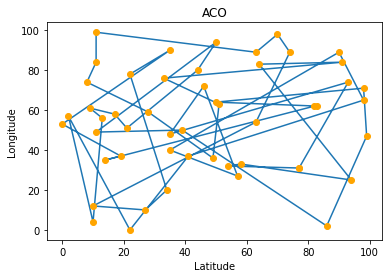

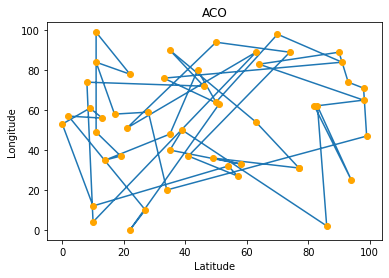

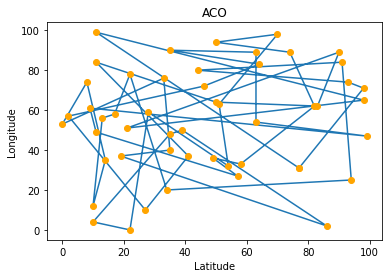

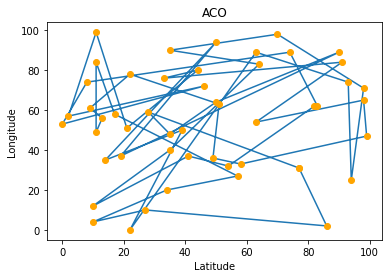

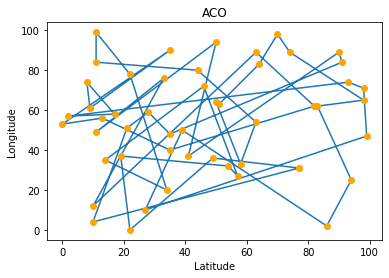

In [ ]:
s_iter,total_list = aco_results()
for index in range(len(s_iter)):
  acoCityX,acoCityY = sortCitiesSolution(s_iter[index])
  fig,ax = plt.subplots()
  plt.scatter(acoCityX,acoCityY ,color='orange',zorder=1)
  plt.plot(acoCityX,acoCityY ,zorder=0)
  ax.set_ylabel('Longitude')
  ax.set_xlabel('Latitude')
  ax.set_title('ACO')
  #plt.set_xticks(ind)
  fig.savefig("aco.png")
  plt.show()